<a href="https://colab.research.google.com/github/kayserena/machine_learning_datathon_3/blob/main/Diabetes_Data_Exploratory_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn import datasets
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

df = pd.read_excel('Diabetes Study File 10K Dec 14 2017.xlsx')

sex_counts = df['Sex'].value_counts()

# Calculating the total count of entries in 'sex' column
total_count = sex_counts.sum()

# Calculating the percentage of males
percentage_male = (sex_counts[1] / total_count) * 100

# Calculating the percentage of females
percentage_female = (sex_counts[0] / total_count) * 100

print(f"Percentage of Males: {percentage_male:.2f}%")
print(f"Percentage of Females: {percentage_female:.2f}%")


Percentage of Males: 46.64%
Percentage of Females: 53.36%


In [ ]:
print(sex_counts)

Female    5336
Male      4664
Name: Sex, dtype: int64


In [ ]:
sBP_Datedate_min = df['sBP_Date'].min()
sBP_Datedate_max = df['sBP_Date'].max()

print("Start date:", sBP_Datedate_min)
print("End date:", sBP_Datedate_max)

BMI_Datedate_min = df['BMI_Date'].min()
BMI_Datedate_max = df['BMI_Date'].max()

print("Start date:", BMI_Datedate_min)
print("End date:", BMI_Datedate_max)

LDL_Datedate_min = df['LDL_Date'].min()
LDL_Datedate_max = df['LDL_Date'].max()

print("Start date:", LDL_Datedate_min)
print("End date:", LDL_Datedate_max)

HDL_Datedate_min = df['HDL_Date'].min()
HDL_Datedate_max = df['HDL_Date'].max()

print("Start date:", HDL_Datedate_min)
print("End date:", HDL_Datedate_max)

A1c_Datedate_min = df['A1c_Date'].min()
A1c_Datedate_max = df['A1c_Date'].max()

print("Start date:", A1c_Datedate_min)
print("End date:", A1c_Datedate_max)

TG_Datedate_min = df['TG_Date'].min()
TG_Datedate_max = df['TG_Date'].max()

print("Start date:", TG_Datedate_min)
print("End date:", TG_Datedate_max)

FBS_Datedate_min = df['FBS_Date'].min()
FBS_Datedate_max = df['FBS_Date'].max()

print("Start date:", FBS_Datedate_min)
print("End date:", FBS_Datedate_max)

Total_Cholesterol_Lab_Datedate_min = df['Total_Cholesterol_Lab_Date'].min()
Total_Cholesterol_Lab_Datedate_max = df['Total_Cholesterol_Lab_Date'].max()

print("Start date:", Total_Cholesterol_Lab_Datedate_min)
print("End date:", Total_Cholesterol_Lab_Datedate_max)

DM_OnsetDatedate_min = df['DM_OnsetDate'].min()
DM_OnsetDatedate_max = df['DM_OnsetDate'].max()

print("Start date:", DM_OnsetDatedate_min)
print("End date:", DM_OnsetDatedate_max)


Depression_OnsetDatedate_min = df['Depression_OnsetDate'].min()
Depression_OnsetDatedate_max = df['Depression_OnsetDate'].max()

print("Start date:", Depression_OnsetDatedate_min)
print("End date:", Depression_OnsetDatedate_max)

Depression_OnsetDatedate_min = df['Depression_OnsetDate'].min()
Depression_OnsetDatedate_max = df['Depression_OnsetDate'].max()

print("Start date:", Depression_OnsetDatedate_min)
print("End date:", Depression_OnsetDatedate_max)

Start date: 2004-02-02 00:00:00
End date: 2015-06-30 00:00:00
Start date: 2003-10-02 00:00:00
End date: 2015-06-30 00:00:00
Start date: 2004-01-03 00:00:00
End date: 2015-06-30 00:00:00
Start date: 2004-01-03 00:00:00
End date: 2015-06-30 00:00:00
Start date: 2004-01-03 00:00:00
End date: 2015-06-30 00:00:00
Start date: 2004-01-03 00:00:00
End date: 2015-06-30 00:00:00
Start date: 2004-01-03 00:00:00
End date: 2015-06-30 00:00:00
Start date: 2004-01-03 00:00:00
End date: 2015-06-30 00:00:00
Start date: 1989-01-01 00:00:00
End date: 2015-06-30 00:00:00
Start date: 1997-01-01 00:00:00
End date: 2015-06-30 00:00:00
Start date: 1997-01-01 00:00:00
End date: 2015-06-30 00:00:00


In [ ]:
pd.set_option('display.max_columns', None)

# Now, when you use head(), it will show all columns
print(df.head())

   Age_at_Exam    sBP   sBP_Date        BMI   BMI_Date   LDL   LDL_Date   HDL  \
0           65  126.0 2013-06-11  31.000000 2013-06-11  1.66 2013-06-14  1.11   
1           62  135.0 2014-06-19  25.846483 2014-10-17  2.49 2014-05-28  1.37   
2           63  133.0 2012-07-31  30.900000 2011-12-01  1.65 2012-06-01   NaN   
3           51  136.0 2014-01-06  56.710775 2014-01-06  2.80 2014-01-14  1.94   
4           40  123.0 2015-06-12  33.067867 2015-06-12  2.48 2015-06-24  1.17   

    HDL_Date  A1c   A1c_Date    TG    TG_Date  FBS   FBS_Date  FBS>DM  \
0 2013-06-14  5.4 2013-06-14  2.28 2013-06-14  5.8 2013-06-14       1   
1 2014-05-28  5.8 2014-10-25  1.37 2014-05-28  5.4 2014-05-28       1   
2        NaT  6.1 2012-06-01  0.76 2012-06-01  5.6 2012-06-01       1   
3 2014-01-14  6.0 2014-01-14  0.99 2014-01-14  6.0 2014-01-14       1   
4 2015-06-24  5.8 2015-06-24  1.04 2015-06-24  5.2 2015-06-24       1   

   Total_Cholesterol Total_Cholesterol_Lab_Date  Diabetes DM_OnsetDate  \


# 1.0 Data Exploration

# 1.1 Number of missing values in each column


In [ ]:
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    print(df.isnull().sum())

Age_at_Exam                                   0
sBP                                           4
sBP_Date                                      0
BMI                                           0
BMI_Date                                      0
LDL                                          61
LDL_Date                                      0
HDL                                          72
HDL_Date                                     64
A1c                                           0
A1c_Date                                      0
TG                                           53
TG_Date                                      42
FBS                                           0
FBS_Date                                      0
FBS>DM                                        0
Total_Cholesterol                           207
Total_Cholesterol_Lab_Date                  197
Diabetes                                      0
DM_OnsetDate                               4863
Depression                              

In [ ]:
print(df.shape)

(10000, 43)


In [ ]:
pd.set_option('display.max_columns', None)

# Now, when you use head(), it will show all columns
print(df.head())

   Age_at_Exam    sBP   sBP_Date        BMI   BMI_Date   LDL   LDL_Date   HDL  \
0           65  126.0 2013-06-11  31.000000 2013-06-11  1.66 2013-06-14  1.11   
1           62  135.0 2014-06-19  25.846483 2014-10-17  2.49 2014-05-28  1.37   
2           63  133.0 2012-07-31  30.900000 2011-12-01  1.65 2012-06-01   NaN   
3           51  136.0 2014-01-06  56.710775 2014-01-06  2.80 2014-01-14  1.94   
4           40  123.0 2015-06-12  33.067867 2015-06-12  2.48 2015-06-24  1.17   

    HDL_Date  A1c   A1c_Date    TG    TG_Date  FBS   FBS_Date  FBS>DM  \
0 2013-06-14  5.4 2013-06-14  2.28 2013-06-14  5.8 2013-06-14       1   
1 2014-05-28  5.8 2014-10-25  1.37 2014-05-28  5.4 2014-05-28       1   
2        NaT  6.1 2012-06-01  0.76 2012-06-01  5.6 2012-06-01       1   
3 2014-01-14  6.0 2014-01-14  0.99 2014-01-14  6.0 2014-01-14       1   
4 2015-06-24  5.8 2015-06-24  1.04 2015-06-24  5.2 2015-06-24       1   

   Total_Cholesterol Total_Cholesterol_Lab_Date  Diabetes DM_OnsetDate  \


In [ ]:

# Check for duplicates in the "patient_ID" column
duplicates = df['Patient_ID'].duplicated()

# Create a DataFrame of duplicated rows
duplicates_df = df[duplicates]

# Display the duplicated rows
#with pd.option_context("display.max_rows", None, "display.max_columns", None):
    #print(duplicates_df)

rows = len(duplicates_df.axes[0])
print(rows)

1398


# 1.2 Percentage of DIABETES dichotomized outcome
Checking for data imbalance

In [ ]:
import pandas as pd

# Use value_counts() to count the occurrences of each level
value_counts = df['DIABETES'].value_counts()

# Calculate the percentage based on the total count
percentage = (value_counts / len(df)) * 100

# Display the percentage for each level
print(percentage)

print(value_counts)

Yes    51.39
No     48.61
Name: DIABETES, dtype: float64
Yes    5139
No     4861
Name: DIABETES, dtype: int64


In [ ]:
# Checking for data imbalance

import plotly.express as px

# Compute the count of each class in the 'target' column
counts = df['DIABETES'].value_counts()

# Define colors for the pie chart sections
colors = ['#a3416c', '#ebc898']

# Construct a pie chart with plotly
# 'names' are the class labels, and 'values' are the counts for each class
fig = px.pie(
    names=counts.index,
    values=counts.values,
    hole=0.5,  # creates a donut-styled pie chart
    title='Distribution of Classes in "target"',
    color_discrete_sequence=colors
)

# Update the layout of the pie chart for better presentation and clarity
fig.update_layout(
    margin=dict(t=50, b=0, l=0, r=0),
    legend=dict(
        orientation="v",
        yanchor="top",
        y=0.5,
        xanchor="left",
        x=1.05,
        title='DIABETES'
    ),
    title=dict(
        text='Distribution of Classes in "DIABETES"',
        x=0.45,
        xanchor='center',
        y=0.95,
        yanchor='top',
        font=dict(size=16)
    ),
    width=500,
    height=350
)

# Display the pie chart
fig.show()

# 1.3 Distribution of features

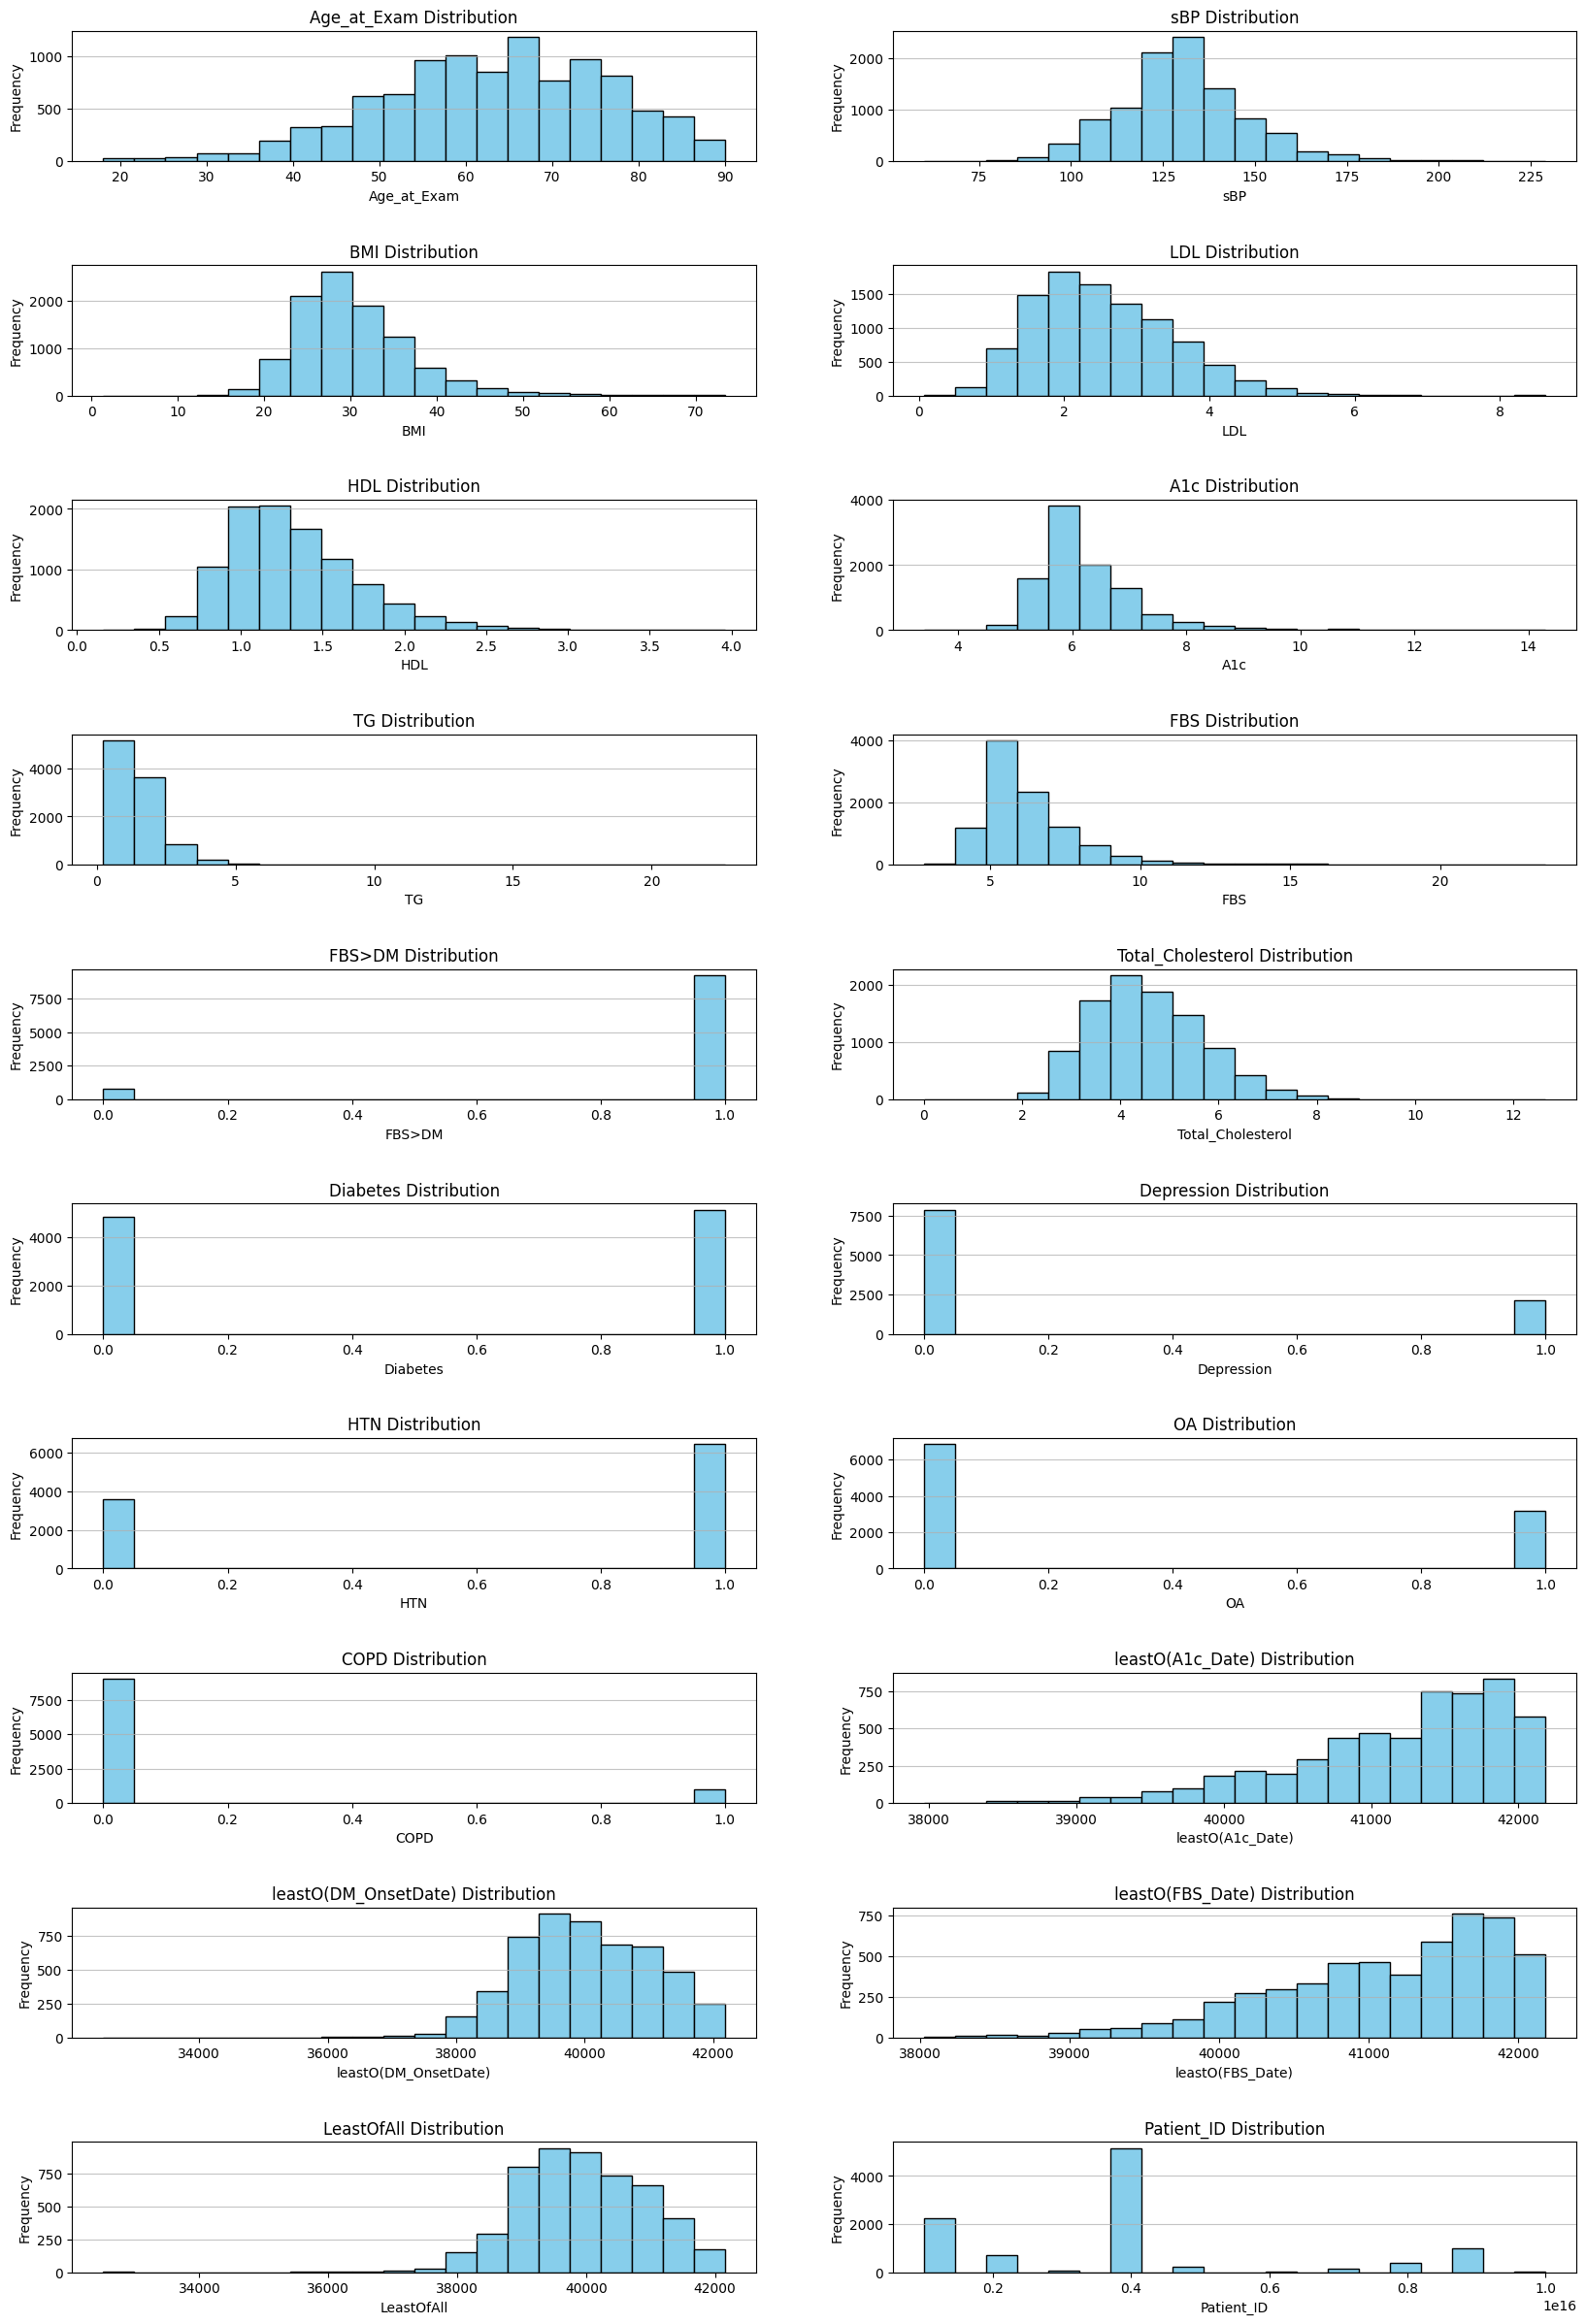

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get the list of column names (excluding non-numeric columns)
numeric_columns = df.select_dtypes(include=['number']).columns

# Calculate the number of rows and columns for the grid
num_columns_per_row = 2
num_rows = (len(numeric_columns) + num_columns_per_row - 1) // num_columns_per_row

# Create a grid of histograms
fig, axes = plt.subplots(num_rows, num_columns_per_row, figsize=(20, 30))
fig.subplots_adjust(hspace=0.8)

for i, column in enumerate(numeric_columns):
    row = i // num_columns_per_row
    col = i % num_columns_per_row

    ax = axes[row, col]
    ax.hist(df[column], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'{column} Distribution')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.grid(axis='y', alpha=0.75)

# Remove any empty subplots
for i in range(len(numeric_columns), num_rows * num_columns_per_row):
    fig.delaxes(axes.flatten()[i])

plt.show()

# 1.4 Summarizing Measures of Central Tendency

In [ ]:
print(df.describe())

        Age_at_Exam          sBP           BMI          LDL          HDL  \
count  10000.000000  9996.000000  10000.000000  9939.000000  9928.000000   
mean      63.197600   130.394358     30.415909     2.540959     1.321803   
std       13.127627    17.018794      6.831567     0.949213     0.402217   
min       18.000000    60.000000      1.376352     0.070000     0.160000   
25%       54.000000   120.000000     25.898654     1.820000     1.040000   
50%       64.000000   130.000000     29.300000     2.400000     1.250000   
75%       73.000000   140.000000     33.790000     3.160000     1.540000   
max       90.000000   229.000000     73.400000     8.630000     3.960000   

                A1c           TG           FBS        FBS>DM  \
count  10000.000000  9947.000000  10000.000000  10000.000000   
mean       6.266754     1.553615      6.311903      0.922800   
std        0.954380     1.021511      1.733209      0.266922   
min        3.400000     0.240000      2.800000      0.00000

# 1.5 Observing Feature Correlations

In [ ]:
print(df.dtypes)

Age_at_Exam                                         int64
sBP                                               float64
sBP_Date                                   datetime64[ns]
BMI                                               float64
BMI_Date                                   datetime64[ns]
LDL                                               float64
LDL_Date                                   datetime64[ns]
HDL                                               float64
HDL_Date                                   datetime64[ns]
A1c                                               float64
A1c_Date                                   datetime64[ns]
TG                                                float64
TG_Date                                    datetime64[ns]
FBS                                               float64
FBS_Date                                   datetime64[ns]
FBS>DM                                              int64
Total_Cholesterol                                 float64
Total_Choleste

<ipython-input-19-4dc12035e7ec>:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

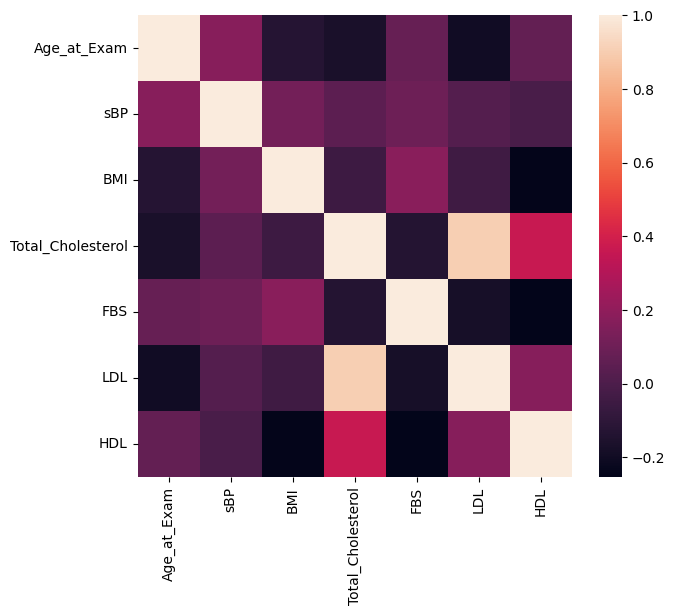

In [ ]:
columns_to_check = ["Age_at_Exam","sBP","BMI","Total_Cholesterol","FBS","LDL","HDL"]
target_column = "DIABETES"

plt.figure(figsize=(7,6))
sns.heatmap(df[columns_to_check + [target_column]].corr())

# 2.0 Model Development

# *2.1 Building Combined Naive Bayes Classifier*

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Transform Sex
df['Sex'].replace({'Female':0, 'Male':1}, inplace=True)

# Splitting the original dataset into training, validation, and test sets

# Taking 70% of the data for training
train_df = df.sample(frac = 0.7)

# Removing the training data from the original dataset to get the combined validation and test data
test_df = df.drop(train_df.index)

# Splitting the combined validation and test data into two equal parts for validation and testing, respectively
valid_df = test_df.sample(frac = 0.5)
test_df = test_df.drop(valid_df.index)

# Use SimpleImputer to compute the median of 'LDL' in the training set
imputer = SimpleImputer(strategy='median')
## By filling missing values with the median, we are using a central value that is less sensitive to
#outliers compared to the mean. This is a common strategy for imputing missing numerical data because
#it can help preserve the overall distribution of the data.
imputer.fit(train_df[["LDL"]])

# Use this mean to fill the NaN values in both training, validation, and test sets
train_df["LDL"] = imputer.transform(train_df[['LDL']])
valid_df["LDL"] = imputer.transform(valid_df[['LDL']])
test_df['LDL'] = imputer.transform(test_df[['LDL']])

Definining utility functions for model evaluation

In [ ]:
def get_scores(Y, Y_pred):
    """
    Computes various evaluation metrics for model predictions.

    Parameters:
    - Y: Actual target values.
    - Y_pred: Predicted target values by the model.

    Returns:
    - conf_matrix: Confusion matrix showing true positives, true negatives, false positives, and false negatives.
    - class_report: Classification report detailing precision, recall, and F1-score for each class.
    - auc: Area Under the Curve (AUC) value for the model's predictions.
    - acc: Accuracy of the model's predictions.
    """
    conf_matrix = confusion_matrix(Y, Y_pred)
    class_report = classification_report(Y, Y_pred)
    auc = roc_auc_score(Y, Y_pred)
    acc = accuracy_score(Y, Y_pred)

    return conf_matrix, class_report, auc, acc

def print_scores(conf_matrix, class_report, auc, acc):
    """
    Prints the evaluation metrics in a structured format.

    Parameters:
    - conf_matrix: Confusion matrix from get_scores function.
    - class_report: Classification report from get_scores function.
    - auc: AUC value from get_scores function.
    - acc: Accuracy value from get_scores function.
    """
    print('AUC : ', auc)
    print('Accuracy : ', acc)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)

Evaluating the Combined Naive Bayes Model on Training Data:




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but CategoricalNB was fitted without feature names
  warnings.warn(


AUC :  0.8084432910942062
Accuracy :  0.8065714285714286
Confusion Matrix:
[[2890  478]
 [ 876 2756]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.86      0.81      3368
           1       0.85      0.76      0.80      3632

    accuracy                           0.81      7000
   macro avg       0.81      0.81      0.81      7000
weighted avg       0.81      0.81      0.81      7000



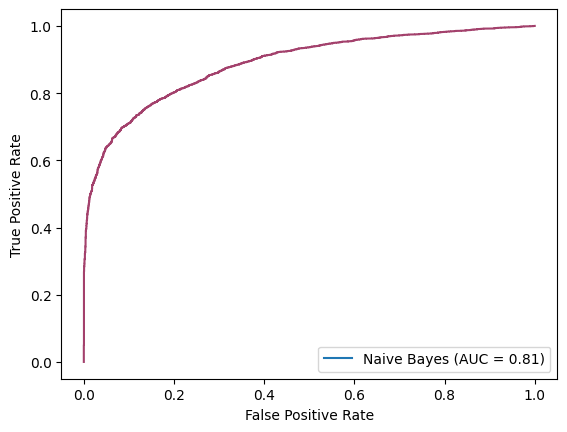

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import RocCurveDisplay, roc_curve, accuracy_score, confusion_matrix, roc_auc_score, classification_report

continuous_variables = ["Age_at_Exam", "LDL", "FBS"]
binary_variables = ["Sex", "HTN", "COPD"]

# Training a Gaussian Naive Bayes model for continuous variables
gnb = GaussianNB()
gnb = gnb.fit(train_df[continuous_variables].to_numpy(), train_df["Diabetes"])

# Training a Categorical Naive Bayes model for categorical variables
cnb = CategoricalNB()
cnb = cnb.fit(train_df[binary_variables].to_numpy(), train_df["Diabetes"])

# Getting joint log probabilities for each model
gnb_log_pred = gnb.predict_joint_log_proba(train_df[continuous_variables])
cnb_log_pred = cnb.predict_joint_log_proba(train_df[binary_variables])

# Combine the log probabilities
y_hat_prob = gnb_log_pred + cnb_log_pred

# Convert log probabilities back to probabilities
y_hat_prob = np.exp(y_hat_prob)
y_hat_prob = y_hat_prob / y_hat_prob.sum(1, keepdims=True)  # normalize to get valid probabilities

# Get the predicted class labels
y_hat = np.argmax(y_hat_prob, axis=1)

# Evaluate the combined model using custom functions
conf_matrix, class_report, auc, acc = get_scores(train_df["Diabetes"], y_hat)
print_scores(conf_matrix, class_report, auc, acc)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(train_df["Diabetes"], y_hat_prob[:, 1])
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Naive Bayes')
display.plot()
ax = plt.gca()
ax.get_lines()[0].set_color('#a3416c')

Evaluating the Combined Naive Bayes Model on Validation Data:





/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but CategoricalNB was fitted without feature names
  warnings.warn(


AUC :  0.8005283593127772
Accuracy :  0.8006666666666666
Confusion Matrix:
[[641 111]
 [188 560]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       752
           1       0.83      0.75      0.79       748

    accuracy                           0.80      1500
   macro avg       0.80      0.80      0.80      1500
weighted avg       0.80      0.80      0.80      1500



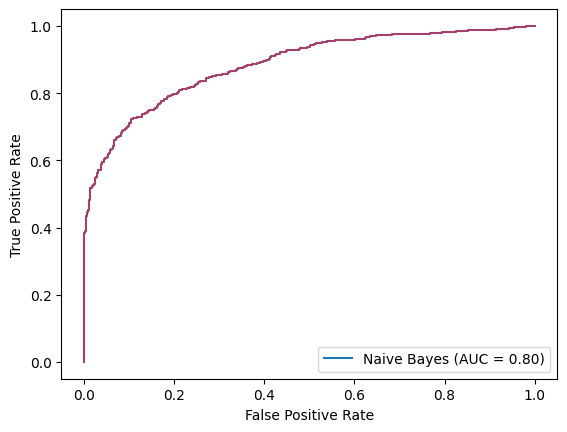

In [ ]:
# Getting joint log probabilities for each model
gnb_log_pred = gnb.predict_joint_log_proba(valid_df[continuous_variables])
cnb_log_pred = cnb.predict_joint_log_proba(valid_df[binary_variables])

# Combine the log probabilities
y_hat_prob = gnb_log_pred + cnb_log_pred

# Convert log probabilities back to probabilities
y_hat_prob = np.exp(y_hat_prob)
y_hat_prob = y_hat_prob / y_hat_prob.sum(1, keepdims=True)  # normalize to get valid probabilities

# Get the predicted class labels
y_hat = np.argmax(y_hat_prob, axis=1)

# Evaluate the combined model using custom functions
conf_matrix, class_report, auc, acc = get_scores(valid_df["Diabetes"], y_hat)
print_scores(conf_matrix, class_report, auc, acc)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(valid_df["Diabetes"], y_hat_prob[:, 1])
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Naive Bayes')
display.plot()
ax = plt.gca()
ax.get_lines()[0].set_color('#a3416c')

Evaluating the Combined Naive Bayes Model on Test Data:


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but CategoricalNB was fitted without feature names
  warnings.warn(


AUC :  0.5005333371259528
Accuracy :  0.5006666666666667
Confusion Matrix:
[[414 338]
 [411 337]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.55      0.53       752
           1       0.50      0.45      0.47       748

    accuracy                           0.50      1500
   macro avg       0.50      0.50      0.50      1500
weighted avg       0.50      0.50      0.50      1500



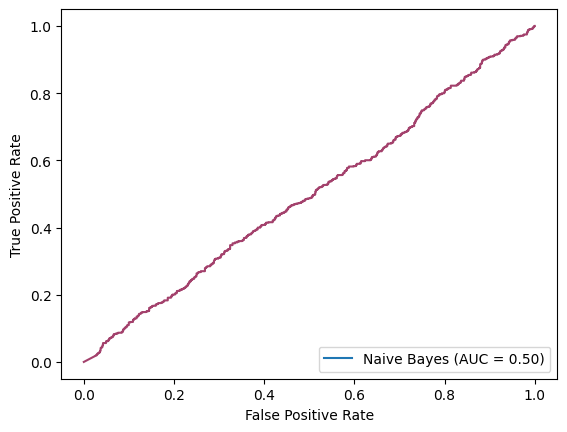

In [ ]:
# Getting joint log probabilities for each model
gnb_log_pred = gnb.predict_joint_log_proba(test_df[continuous_variables])
cnb_log_pred = cnb.predict_joint_log_proba(test_df[binary_variables])

# Combine the log probabilities
y_hat_prob = gnb_log_pred + cnb_log_pred

# Convert log probabilities back to probabilities
y_hat_prob = np.exp(y_hat_prob)
y_hat_prob = y_hat_prob / y_hat_prob.sum(1, keepdims=True)  # normalize to get valid probabilities

# Get the predicted class labels
y_hat = np.argmax(y_hat_prob, axis=1)

# Evaluate the combined model using custom functions
conf_matrix, class_report, auc, acc = get_scores(valid_df["Diabetes"], y_hat)
print_scores(conf_matrix, class_report, auc, acc)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(valid_df["Diabetes"], y_hat_prob[:, 1])
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Naive Bayes')
display.plot()
ax = plt.gca()
ax.get_lines()[0].set_color('#a3416c')

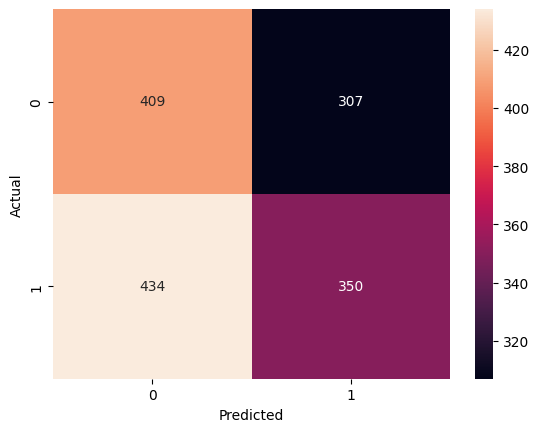

In [ ]:
# Confusion Matrix heat map
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


# *2.2 Building logistic regression model - no interaction*

In [ ]:
# Transforming binary variables
df['Sex'].replace({'Female':0, 'Male':1}, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
import numpy as np

# Specify your features and target variable
df2 = df[["Depression", "Sex", "HTN", "COPD", "Age_at_Exam", "LDL", "FBS", "Diabetes"]]
X = df2.drop(['Diabetes'], axis=1)
y = df2['Diabetes']

# Split the data into training (70%) and a temporary set (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=26)

# Split the temporary set into testing (15%) and validation (15%)
X_test, X_valid, y_test, y_valid = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Use SimpleImputer to compute the median of 'LDL' in the training set
imputer = SimpleImputer(strategy='median')
imputer.fit(X_train[["LDL"]])

# Use this to fill the NaN values in both training, validation, and test sets
X_train["LDL"] = imputer.transform(X_train[['LDL']])
X_test['LDL'] = imputer.transform(X_test[['LDL']])
X_valid['LDL'] = imputer.transform(X_valid[['LDL']])

# Normalizing data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Train a logistic regression model
log_reg = LogisticRegression(penalty='l1', C=1.0, solver='liblinear')
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

Validation Set Cross-Validation Scores: [0.8        0.83666667 0.84333333 0.85666667 0.78333333]


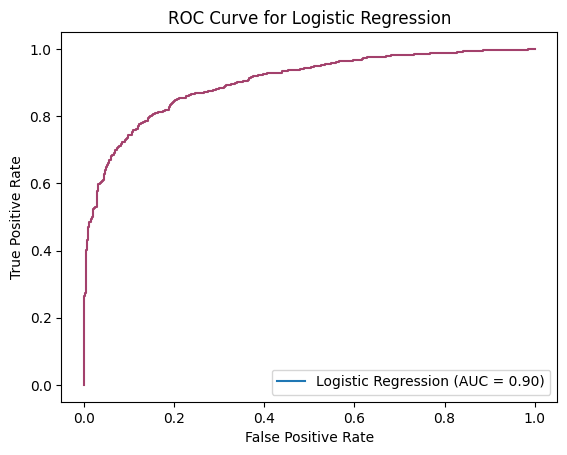

Test Set Accuracy: 0.8186666666666667


In [ ]:
# Perform k-fold cross-validation on the validation set
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
validation_scores = cross_val_score(log_reg, X_valid_scaled, y_valid, cv=kfold, scoring='accuracy')

# Print cross-validation scores on the validation set
print("Validation Set Cross-Validation Scores:", validation_scores)

# Plot the ROC curve for the validation set
from sklearn.metrics import roc_curve, RocCurveDisplay, auc
import matplotlib.pyplot as plt

y_pred_valid = log_reg.predict_proba(X_valid_scaled)[:, 1]
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_valid, log_reg.predict_proba(X_valid_scaled)[:, 1])

# Display the ROC curve
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc(fpr, tpr), estimator_name='Logistic Regression')
display.plot()

# Customize the plot
ax = plt.gca()
ax.get_lines()[0].set_color('#a3416c')
plt.title('ROC Curve for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

test_accuracy = log_reg.score(X_valid_scaled, y_valid)
print("Test Set Accuracy:", test_accuracy)

In [ ]:

# Use the model to make predictions on the testing data
y_pred = log_reg.predict(X_test_scaled)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[618 107]
 [167 608]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       725
           1       0.85      0.78      0.82       775

    accuracy                           0.82      1500
   macro avg       0.82      0.82      0.82      1500
weighted avg       0.82      0.82      0.82      1500



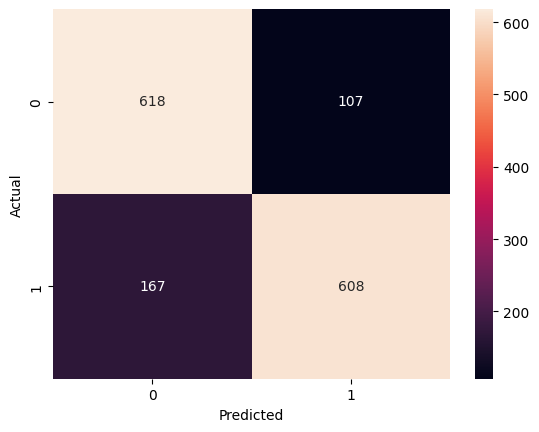

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
import statsmodels.api as sm
import pandas as pd

# Separate features and target variable

df22 = df[["Depression", "Sex", "HTN", "COPD", "Age_at_Exam", "LDL", "FBS", "Diabetes"]]
X = df22.drop(['Diabetes'], axis=1)
y = df22['Diabetes']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Impute with median
imputer = SimpleImputer(strategy='median')
imputer.fit(X[["LDL"]])
X["LDL"] = imputer.transform(X[['LDL']])

# Create and fit logistic regression model
log_reg1 = sm.Logit(y, X).fit()

# Coefficients and their standard errors
coefficients = log_reg1.params
standard_errors = log_reg1.bse

# Calculate odds ratios
odds_ratios = np.exp(coefficients)

# Calculate 95% CI for odds ratios
lower_bound = np.exp(coefficients - 1.96 * standard_errors)
upper_bound = np.exp(coefficients + 1.96 * standard_errors)

# Print results
for idx, coef in enumerate(log_reg1.params.index):
    print(f"For {coef}: Odds Ratio: {odds_ratios[idx]:.4f}, 95% CI: ({lower_bound[idx]:.4f}, {upper_bound[idx]:.4f})")

# calculate specific OR for age difference of 10 years
odds_ratios = np.exp(10 * coefficients['Age_at_Exam'])  # Adjust for a 10-year difference

# Calculate 95% CI for odds ratios
lower_bound = np.exp(10 * (coefficients['Age_at_Exam'] - 1.96 * standard_errors['Age_at_Exam']))
upper_bound = np.exp(10 * (coefficients['Age_at_Exam'] + 1.96 * standard_errors['Age_at_Exam']))
print(f"For a 10-year difference in Age_at_Exam: Odds Ratio: {odds_ratios:.4f}, 95% CI: ({lower_bound:.4f}, {upper_bound:.4f})")

# Get summary report
summary = log_reg1.summary()
print(summary)


Optimization terminated successfully.
         Current function value: 0.393083
         Iterations 8
For const: Odds Ratio: 0.0000, 95% CI: (0.0000, 0.0001)
For Depression: Odds Ratio: 1.0413, 95% CI: (0.9090, 1.1928)
For Sex: Odds Ratio: 0.9033, 95% CI: (0.8069, 1.0112)
For HTN: Odds Ratio: 1.3958, 95% CI: (1.2343, 1.5785)
For COPD: Odds Ratio: 1.0140, 95% CI: (0.8458, 1.2156)
For Age_at_Exam: Odds Ratio: 1.0069, 95% CI: (1.0022, 1.0116)
For LDL: Odds Ratio: 0.5150, 95% CI: (0.4826, 0.5496)
For FBS: Odds Ratio: 6.3926, 95% CI: (5.8987, 6.9279)
For a 10-year difference in Age_at_Exam: Odds Ratio: 1.0712, 95% CI: (1.0225, 1.1223)
                           Logit Regression Results                           
Dep. Variable:               Diabetes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9992
Method:                           MLE   Df Model:                            7
Date:                Tue, 31 Oct 2023   Pseudo

# *2.3 Building logistic regression model - interaction*
Looking to test inference and significance of an interaction

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# Transforming binary variables
df['Sex'].replace({'Female':0, 'Male':1}, inplace=True)

# Defining the independent variables and the dependent variable (Diabetes status)
df3 = df[["Depression","Sex","HTN","COPD","Age_at_Exam","LDL","FBS","DIABETES"]]
median_LDL = df3["LDL"].median()
df3["LDL"] = df3["LDL"].fillna(median_LDL) # Imputing with median LDL value

df3['DIABETES'].replace({'No':0, 'Yes':1}, inplace=True)

# Defining interaction term again
df3["Interaction1"] = df3["Sex"] * df3["LDL"]

X = sm.add_constant(df3[["Depression","Sex","HTN","COPD","Age_at_Exam","LDL","FBS", "Interaction1"]])
y = df3["DIABETES"]

# Creating a logistic regression model with the interaction term
model = sm.Logit(y, X)
result = model.fit()

# Print the logistic regression summary
print(result.summary())

# Coefficients and their standard errors
coefficients = result.params
standard_errors = result.bse

# Calculate odds ratios
odds_ratios = np.exp(coefficients)

# Calculate 95% CI for odds ratios
lower_bound = np.exp(coefficients - 1.96 * standard_errors)
upper_bound = np.exp(coefficients + 1.96 * standard_errors)

# Print results
for idx, coef in enumerate(result.params.index):
    print(f"For {coef}: Odds Ratio: {odds_ratios[idx]:.4f}, 95% CI: ({lower_bound[idx]:.4f}, {upper_bound[idx]:.4f})")

Optimization terminated successfully.
         Current function value: 0.392963
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               DIABETES   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9991
Method:                           MLE   Df Model:                            8
Date:                Tue, 31 Oct 2023   Pseudo R-squ.:                  0.4328
Time:                        19:36:06   Log-Likelihood:                -3929.6
converged:                       True   LL-Null:                       -6927.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -10.0834      0.296    -34.045      0.000     -10.664      -9.503
Depression       0.0391

<ipython-input-11-85040ef79cee>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["LDL"] = df3["LDL"].fillna(median_LDL) # Imputing with median LDL value
<ipython-input-11-85040ef79cee>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['DIABETES'].replace({'No':0, 'Yes':1}, inplace=True)
<ipython-input-11-85040ef79cee>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

In [ ]:
print(median_LDL)

2.4


Visualizing the relationship between sex and increasing LDL levels on the outcome of diabetes (univariable model)

Optimization terminated successfully.
         Current function value: 0.639594
         Iterations 5


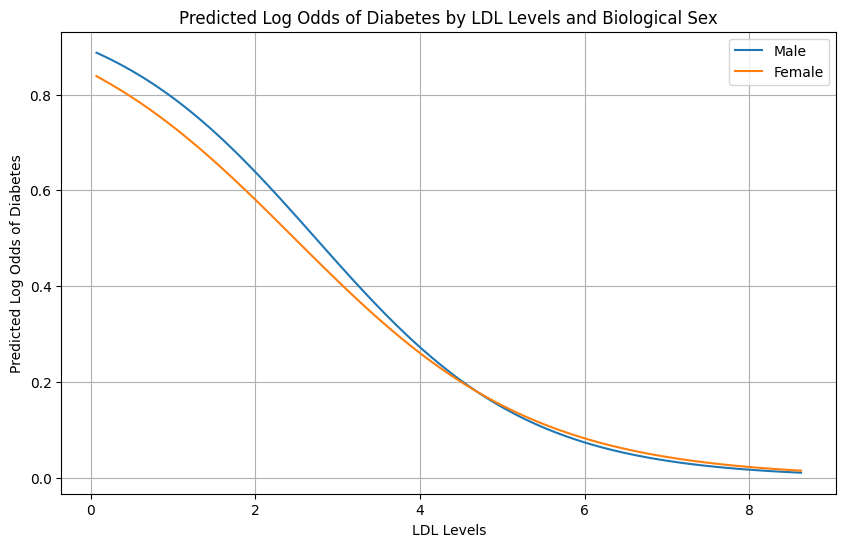

In [ ]:
df4 = df

df4['DIABETES'].replace({'No':0, 'Yes':1}, inplace=True)

median_LDL = df4["LDL"].median()
df4["LDL"] = df4["LDL"].fillna(median_LDL)

# Define the independent variable (LDL levels) and dependent variable (diabetes)
X = df4['LDL']
y = df4['DIABETES']

# Add an interaction term between LDL levels and sex
df4['interaction_term'] = df4['LDL'] * df4['Sex']

# Create a logistic regression model with the interaction term
X = sm.add_constant(df4[['LDL', 'Sex', 'interaction_term']])
model2 = sm.Logit(y, X)
result2 = model2.fit()

LDL_values = np.linspace(df4['LDL'].min(), df4['LDL'].max(),100)
sex_values = [0, 1]

# Create a grid of combinations of CPK levels and hypertension history
grid = [(LDL, sex) for LDL in LDL_values for sex in sex_values]
grid_df = pd.DataFrame(grid, columns=['LDL', 'Sex'])
grid_df['Interaction1'] = grid_df['LDL'] * grid_df['Sex']
grid_df = sm.add_constant(grid_df)

# Calculating predicted values using the logistic regression model
predicted_probabilities = result2.predict(grid_df)

# Separate predicted probabilities for males and females
predicted_prob_male = predicted_probabilities[grid_df['Sex'] == 1]
predicted_prob_female = predicted_probabilities[grid_df['Sex'] == 0]

# Create a chart to visualize the predicted probabilities
plt.figure(figsize=(10, 6))
plt.plot(LDL_values, predicted_prob_male, label='Male')
plt.plot(LDL_values, predicted_prob_female, label='Female')
plt.xlabel('LDL Levels')
plt.ylabel('Predicted Log Odds of Diabetes')
plt.legend()
plt.title('Predicted Log Odds of Diabetes by LDL Levels and Biological Sex')
plt.grid()
plt.show()

# *2.4 Likelihood ratio test of significance of interaction term at a 95% level of confidence*

In [ ]:
import statsmodels.api as sm

# Creating a logistic regression model WITHOUT the interaction term
X3 = sm.add_constant(df3[["Depression","Sex","HTN","COPD","Age_at_Exam","LDL","FBS"]])
model_restricted = sm.Logit(y, X3)
result3 = model_restricted.fit()
#result3.summary()
print(result3.summary())

Optimization terminated successfully.
         Current function value: 0.393083
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               DIABETES   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9992
Method:                           MLE   Df Model:                            7
Date:                Tue, 31 Oct 2023   Pseudo R-squ.:                  0.4326
Time:                        19:37:11   Log-Likelihood:                -3930.8
converged:                       True   LL-Null:                       -6927.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -9.9728      0.287    -34.752      0.000     -10.535      -9.410
Depression      0.0404    

In [ ]:
import scipy

# Extracting log-likelihood values from the model summaries
log_likelihood_full = result.llf
log_likelihood_restricted = result3.llf

# Calculating likelihood ratio Chi-Squared test statistic
LR_statistic = -2*(log_likelihood_restricted-log_likelihood_full)

# Calculating degrees of freedom
degrees_of_freedom = (result.df_model + 1) - (result3.df_model + 1)  # +1 for the intercept term in each model

# Calculating p-value of test statistic
p_value = scipy.stats.chi2.sf(LR_statistic, degrees_of_freedom)

print("Likelihood Ratio Test Statistic:", LR_statistic)
print("p-value:", p_value)

Likelihood Ratio Test Statistic: 2.4086209765173408
p-value: 0.12066862373563729


Therefore, since the p-value of approximately 0.121 is > 0.05, we can conclude at a 95% level confidence that the full model with the interaction term and the restricted model without the interaction term fit the data equally well. This means that we should use the restricted logit model without the interaction term to predict how Depression and other confounders are associated with the log odds of having diabetes in this cohort of patients.